In [5]:
# 폰트 설치
!sudo apt-get install -y fonts-nanum > /dev/null

# 폰트 캐시 업데이트
!fc-cache -fv

# Matplotlib 캐시 폴더 경로 찾기 및 삭제
!rm -rf ~/.cache/matplotlib
print("나눔 폰트 설치 및 Matplotlib 캐시 삭제 완료.")

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/nanum: skipping, looped directory detected
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache director

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Matplotlib의 폰트 설정을 'NanumGothic'으로 지정 (설치가 완료되었으므로 이제 적용됨)
plt.rcParams['font.family'] = 'NanumGothic'
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("라이브러리 로드 및 폰트 설정 완료.")

라이브러리 로드 및 폰트 설정 완료.


파일 로드 성공: UTF-8

[데이터 프레임 상위 5개 행]
     출판사               단원명  페이지                                     코드  글감제목  \
0  천재교과서  3.1. 고려 시대까지의 문학  159  [12문학03-02], [12문학03-03], [12문학03-04]  단군신화   
1  천재교과서  3.1. 고려 시대까지의 문학  159  [12문학03-02], [12문학03-03], [12문학03-04]  단군신화   
2  천재교과서  3.1. 고려 시대까지의 문학  159  [12문학03-02], [12문학03-03], [12문학03-04]  단군신화   
3  천재교과서  3.1. 고려 시대까지의 문학  159  [12문학03-02], [12문학03-03], [12문학03-04]  단군신화   
4  천재교과서  3.1. 고려 시대까지의 문학  160  [12문학03-02], [12문학03-03], [12문학03-04]  단군신화   

    글쓴이                                            학습활동 질문 활동유형  질문형식  
0  작자미상  1-(1) 단군의 탄생 과정을 중심으로 '변화'라는 관점에서 살펴보고 빈칸을 채워 보자.   이해  표채우기  
1  작자미상  1-(2) 곰은 두 단계를 거쳐 인간으로 완성된다. 그 과정에서 각 단계의 의미를 ...   이해  표채우기  
2  작자미상      1-(3) 탄생 과정과 산신이 된 결말을 통해 드러나는 단군의 특징을 말해 보자.   이해   서술형  
3  작자미상     2-(1) 이 작품에서 신성성을 보여 주는 요소를 인물의 특징과 관련하여 찾아보자.   분석  표채우기  
4  작자미상  2-(2) 단군의 탄생 과정을 중심으로 전개된 건국 신화가 고대 국가 건설 과정에서...   분석   서술형  

[데이터 프레임 정보 (크기, 칼럼 타입)]
<class 'pandas.core.frame.

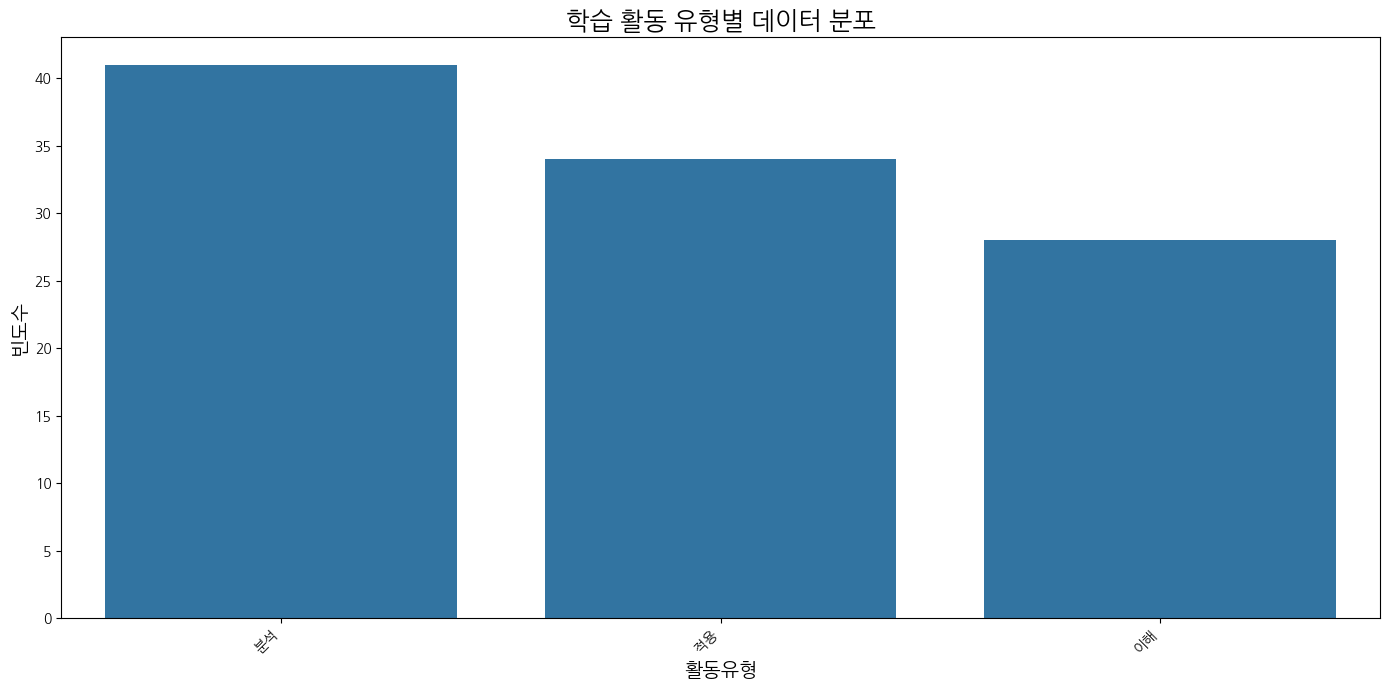

In [3]:
# 파일명을 정확히 입력해 주세요. (예: textbook_activities_korean.csv)
file_name = 'textbook_activities.csv'

# CSV 파일 로드 (인코딩 문제 해결 포함)
try:
    df = pd.read_csv(file_name, encoding='utf-8')
    print("파일 로드 성공: UTF-8")
except UnicodeDecodeError:
    try:
        df = pd.read_csv(file_name, encoding='cp949')
        print("파일 로드 성공: CP949")
    except FileNotFoundError:
        print(f"오류: 파일 '{file_name}'을(를) 현재 경로에서 찾을 수 없습니다.")
        exit()

# --- 1. 데이터 로드 및 기본 정보 ---
print("\n[데이터 프레임 상위 5개 행]")
print(df.head())
print("\n[데이터 프레임 정보 (크기, 칼럼 타입)]")
df.info()
print(f"\n데이터 크기 (행, 열): {df.shape}")

# --- 2. 기본 통계 및 결측값 확인 ---
print("\n[숫자형 칼럼 기본 통계]")
print(df.describe())
print("\n[결측값(NaN) 확인]")
print(df.isnull().sum())

# --- 3. 시각화 ---
# '활동유형' 칼럼 이름이 정확한지 확인해 주세요. (예: '활동 유형' 또는 '활동유형')
activity_counts = df['활동유형'].value_counts()

plt.figure(figsize=(14, 7))
sns.barplot(x=activity_counts.index, y=activity_counts.values)
plt.title('학습 활동 유형별 데이터 분포', fontsize=18)
plt.xlabel('활동유형', fontsize=14)
plt.ylabel('빈도수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


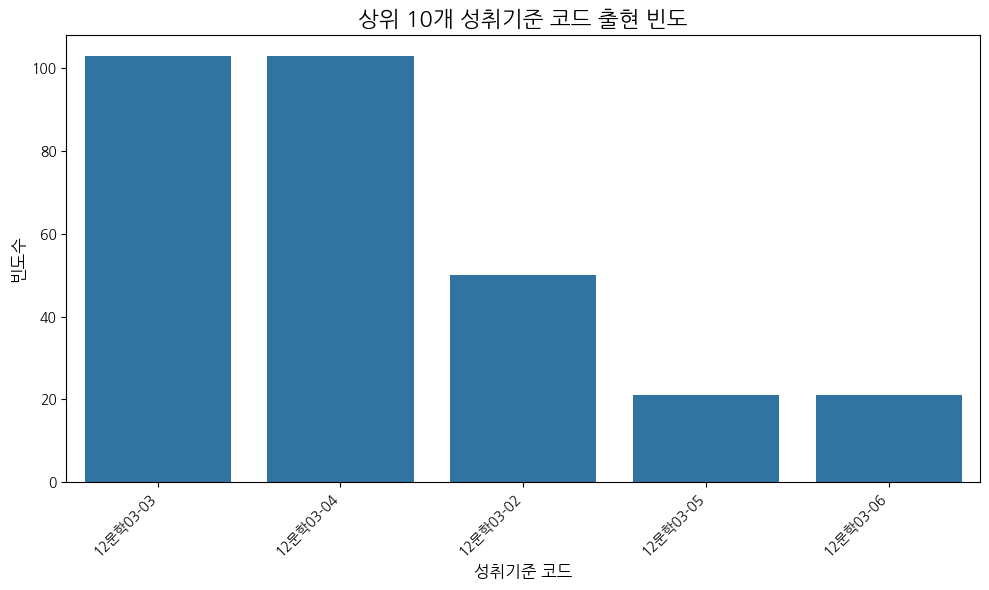

In [4]:
# 1. 다중 라벨 분리 및 단일 코드 리스트 생성 함수
def extract_all_codes(df):
    all_codes = []
    # '코드' 열에서 결측치를 제외하고 순회
    for code_string in df['코드'].dropna():
        # 쉼표를 기준으로 분리하고 괄호, 공백 제거 후 리스트에 추가
        codes = code_string.replace('[', '').replace(']', '').replace(' ', '').split(',')
        all_codes.extend(codes)
    return all_codes

all_codes_list = extract_all_codes(df)
code_counts = pd.Series(all_codes_list).value_counts().sort_values(ascending=False)

# 2. 상위 10개 코드 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=code_counts.head(10).index, y=code_counts.head(10).values)
plt.title('상위 10개 성취기준 코드 출현 빈도', fontsize=16)
plt.xlabel('성취기준 코드', fontsize=12)
plt.ylabel('빈도수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


[상위 10개 의미 있는 마지막 2어절 목록]
['정리해 보자.', '비교해 보자.', '파악해 보자.', '창작해 보자.', '말해 보자.', '생각해 보자.', '표현을 찾아보자.']

[상위 10개 마지막 2어절 교차 빈도표]
활동유형       분석  이해  적용
마지막_2어절              
말해 보자.      1   0   0
비교해 보자.     0   0   2
생각해 보자.     0   0   1
정리해 보자.     0   3   0
창작해 보자.     0   0   1
파악해 보자.     1   0   0
표현을 찾아보자.   0   1   0


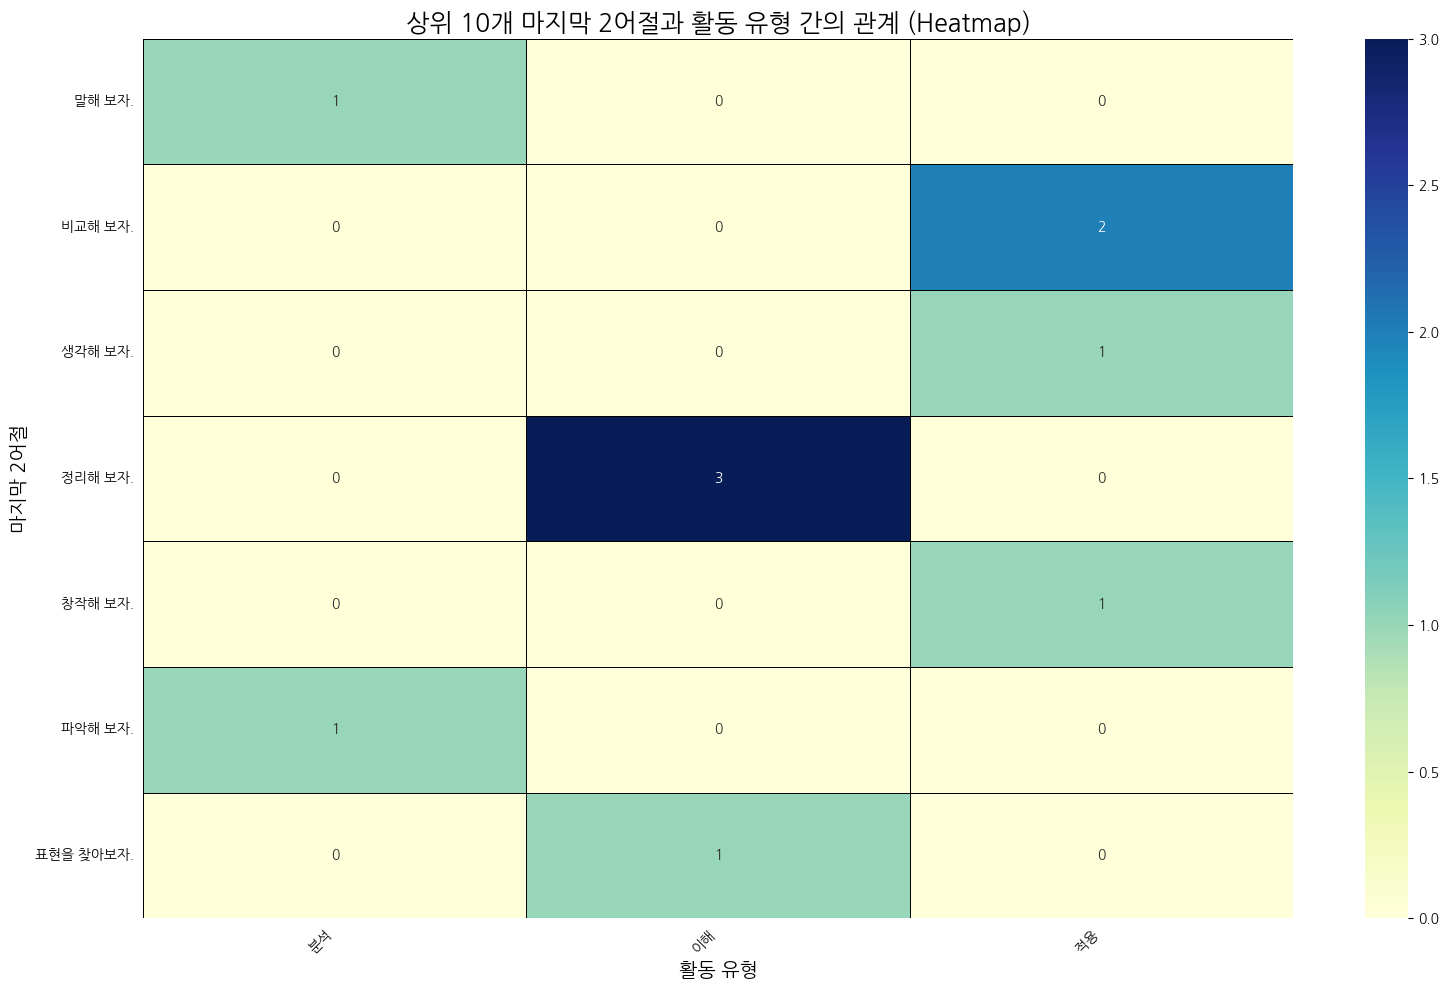

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import re # 노이즈 필터링을 위한 정규표현식 라이브러리 추가

# 경고 필터링을 최상단에 배치
warnings.filterwarnings('ignore', category=UserWarning)

# 파일 이름을 명시
file_name = 'textbook_activities.csv'

# 1. 파일 로드 (Robust Load)
try:
    df = pd.read_csv(file_name, encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv(file_name, encoding='cp949')

# 2. 괄호 처리 로직을 포함한 단일 함수
def extract_last_two_ejeols(question):
    # 입력 유효성 검사
    if not isinstance(question, str) or not question.strip():
        return None

    # 괄호 '('를 기준으로 앞부분만 추출하고 공백 제거
    question_processed = question.split('(')[0].strip()

    # 어절 분리
    ejeols = question_processed.split()

    # 마지막 2어절 추출
    if len(ejeols) >= 2:
        return ' '.join(ejeols[-2:])
    elif len(ejeols) == 1:
        return ejeols[-1]

    return None

# 3. 함수 적용 및 데이터 정리
df['마지막_2어절'] = df['학습활동 질문'].apply(extract_last_two_ejeols)
df_clean = df.dropna(subset=['마지막_2어절', '활동유형'])

# 4. 가장 흔한 마지막 2어절 상위 10개 선택 (노이즈 필터링 로직 통합)

# **[노이즈 필터링 로직]**
# 노이즈 식별 함수: '1-', '2.', '3)' 등 숫자와 기호로만 이루어진 어절을 식별
def is_prefix_noise(s):
    return re.fullmatch(r'^\d+[\-\.\)]?$', s.strip()) is not None

all_ejeol_counts = df_clean['마지막_2어절'].value_counts()

# 노이즈를 제외한 의미 있는 어절만 남깁니다.
meaningful_ejeols_counts = all_ejeol_counts[
    ~all_ejeol_counts.index.map(is_prefix_noise)
]

# 상위 10개 의미 있는 어절을 선택합니다.
top_n = 10
top_n_ejeols = meaningful_ejeols_counts.head(top_n).index
# **[필터링 로직 끝]**


# 5. 교차 빈도표 (Cross-tabulation) 생성
cross_tab = pd.crosstab(
    df_clean[df_clean['마지막_2어절'].isin(top_n_ejeols)]['마지막_2어절'],
    df_clean['활동유형']
)

# 6. Heatmap 시각화 설정 및 저장 (숫자 레이블 제거 로직 통합)
plt.figure(figsize=(16, 10))

# 축 객체(ax)를 캡처합니다.
ax = sns.heatmap(cross_tab, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5, linecolor='black')

plt.title(f'상위 {top_n}개 마지막 2어절과 활동 유형 간의 관계 (Heatmap)', fontsize=18)
plt.xlabel('활동 유형', fontsize=14)
plt.ylabel('마지막 2어절', fontsize=14)

# 불필요한 숫자 레이블 제거 및 라벨 명시적 설정
# y축 레이블을 의미 있는 어절로 채웁니다.
ax.set_yticklabels(cross_tab.index, rotation=0)
ax.set_xticklabels(cross_tab.columns, rotation=45, ha='right')

# 숫자 눈금 및 틱 라인 제거
ax.tick_params(left=False, bottom=False, top=False, right=False)

plt.tight_layout()
plt.savefig('last_two_ejeols_heatmap_final.png')

print("\n[상위 10개 의미 있는 마지막 2어절 목록]")
print(top_n_ejeols.tolist())

print("\n[상위 10개 마지막 2어절 교차 빈도표]")
print(cross_tab)